In [11]:
import numpy as np
import scipy
from scipy.interpolate import interp1d

In [12]:
#generatate MV , CV signal

In [13]:
MV = np.ones(1000)*100

In [14]:
MV[20:50] = 80
MV[150:200] = 140
MV[300:500] =  140

In [15]:
len(MV)

1000

In [16]:
def fopdt(u,k,tau,dt):
    y = 0
    ys = []
    ts = range(len(u))
    uf= interp1d(ts,u)
    for t in ts:
    
        if (t-dt) < 0:
            dydt=0
        else:
            dydt =  (k*uf(t-dt) - y)/tau # look at the brackets  , instead of square brackets. 
            
        y += dydt
        ys.append(y)
    y_arr = np.array(ys)
    return y_arr

In [17]:
dev_MV = MV - MV[0]

In [18]:
dev_MV

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., -20., -20.,
       -20., -20., -20., -20., -20., -20., -20., -20., -20., -20., -20.,
       -20., -20., -20., -20., -20., -20., -20., -20., -20., -20., -20.,
       -20., -20., -20., -20., -20., -20.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,  4

In [19]:
y = fopdt(dev_MV,4,20,5)

In [20]:
import matplotlib.pyplot as plt

In [21]:
plt.plot(y)

In [22]:
%matplotlib inline

In [23]:
y = y + 200

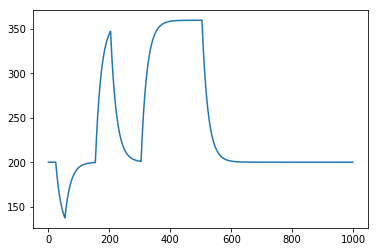

In [24]:
plt.plot(y)

In [25]:
noise = np.random.rand(len(y))*20

In [26]:
y = y +noise

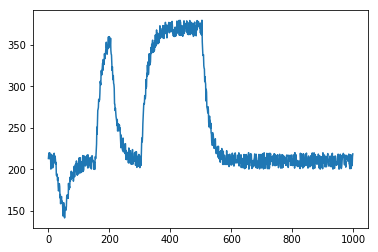

In [27]:
plt.plot(y)

In [28]:
np.c_[MV,y]

array([[ 100.        ,  212.90943089],
       [ 100.        ,  217.13385867],
       [ 100.        ,  219.58241   ],
       ..., 
       [ 100.        ,  204.2588072 ],
       [ 100.        ,  214.89870999],
       [ 100.        ,  218.41759552]])

In [29]:
#introduce slow drifting in y


In [30]:
np.savetxt("simulated_noise_only.csv",np.c_[MV,y],delimiter=",",fmt='%1.3f')

In [31]:
disturbance = np.zeros(1000)
disturbance[700:1000] = 1

In [32]:
y_dist = fopdt(disturbance,50,20,0)

In [33]:
y_dist = y_dist + y

In [34]:
np.savetxt("simulated_input_disturbance.csv",np.c_[MV,y_dist],delimiter=",",fmt='%1.3f')

In [39]:
def ramp(u,k,tau,dt):
    y = 0
    dydt = 0
    ys = []
    ts = range(len(u))
    uf= interp1d(ts,u)
    for t in ts:
    
        if (t-dt) < 0:
            roc_dydt=0
        else:
            roc_dydt =  (k*uf(t-dt) - dydt )/tau
            dydt = dydt+ roc_dydt
            
        y += dydt
        ys.append(y)
    y_arr = np.array(ys)
    return y_arr

In [40]:
y_ramp =  ramp(dev_MV,0.1,10,0)

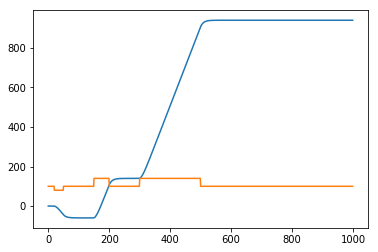

In [42]:
plt.plot(y_ramp)
plt.plot(MV)

In [43]:
y_ramp_dist = ramp(disturbance,-0.5,10,1)

In [44]:
y_ramp = y_ramp+ y_ramp_dist + noise

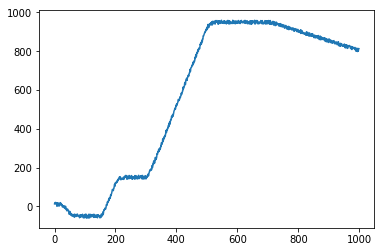

In [45]:
plt.plot(y_ramp)

In [46]:
np.savetxt("ramp.csv",np.c_[y_ramp],delimiter=",",fmt='%1.3f')

In [57]:
# in a first order system , the rate of change is proportional to driving force. 
# in a second order system , there are two driving forces 
# first  driving force is between dydt and d2ydt2
# second driving force is between dydt and y 
def secondorder(u,k,beta,tau1,tau2,dt):
    y  = 0
    dy2dt2 = 0
    dydt = 0
    ys = []
    ts = range(len(u))
    u_int = interp1d(ts,u)
    for t in ts :
        if (t-dt ) < 0:
            dy2dt2 = 0
            dydt = 0
        else:
            dy2dt2 = (k*u_int(t-dt) - y - tau1*dydt) /(tau2*tau2)  # driving force for d2ydt2
            
            dydt = dydt + dy2dt2
            
        y += dydt
        ys.append(y)
    y_arr = np.array(ys)
    return y_arr
 
    
    

In [58]:
y_sec = secondorder(dev_MV,3,0,3,5,0)

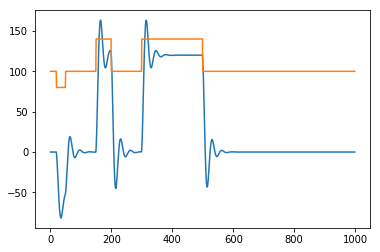

In [60]:
plt.plot(y_sec)
plt.plot(MV)

In [61]:
y_sec = secondorder(dev_MV,3,0,20,5,0)

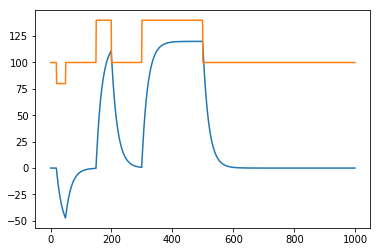

In [62]:
plt.plot(y_sec)
plt.plot(MV)

In [163]:
# second order systems due to beta 
#note that second order systems arise , either due two first order system in series or parallel
# we will consider only series case.  
# difference of two first order systems , with two different gains and time constant
#http://my.chemeng.queensu.ca/courses/CHEE319/documents/CHEE319_notes_2012_lecture4.pdf
#http://www-unix.ecs.umass.edu/~rlaurenc/Courses/ChE446/Second/1Inverse/Inverse1.html

def secondorderbeta(u,k,beta,tau1,tau2,dt):
    y  = 0
    y1=0
    y2=0
    dydt1 = 0
    dydt2 = 0
    ys = []
    ts = range(len(u))
    u_int = interp1d(ts,u)
    for t in ts :
        if (t-dt ) < 0:
            
            dydt1 = 0
            dydt2 = 0
        else:
            #dydt1 = (k*u_int(t-dt) - y)/tau1 #driving force 1 , the self regulating factor is y just like a normal first order process
            dydt2 = -(5*u_int(t-dt) - y2) /tau2 # there is another driving force that is in opposite direction, for example , this is the 
            y2 +=  dydt2
            dydt1 = (10*u_int(t-dt) - y1)/tau1
            y1 +=  dydt1
            y += (dydt1+dydt2)
            # reboiler to quality dynamics , the quality should initially increase in direction and settle                
            
            
        
        ys.append(y)
    y_arr = np.array(ys)
    return y_arr


In [95]:
MV1 = np.zeros(1000)
MV1[50:200] = 1

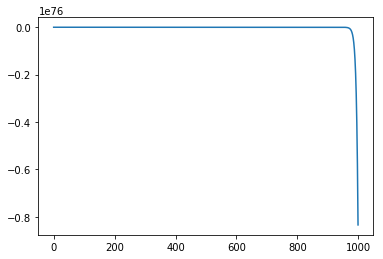

In [164]:
y_sec_beta = secondorderbeta(MV1,2,-5,20,5,0)
plt.plot(y_sec_beta)

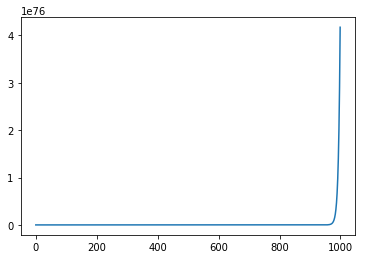

In [80]:
y_sec = secondorder(MV1,5,0,8,5,0)

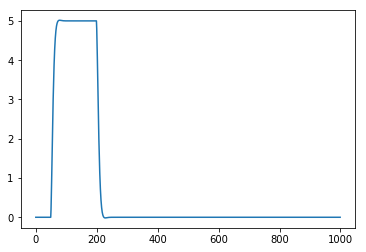

In [81]:
plt.plot(y_sec)

In [82]:
# tested for critical damping , under damping and over damping. seems ok 